In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/df1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/df2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/df3.csv')

In [3]:
# 데이터불균형으로 validation data -> 불리조항(0)으로 변경
df1['dvAntageous'] = 0
df1.tail()

,File Name,clauseArticle,dvAntageous
9211,190_질병보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9212,193_자동차보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9213,199_자동차보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9214,208_질병보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0
9215,209_질병보험_가,"['제39조(소멸시효)\n보험금청구권, 만기환급금청구권, 보험료 반환청구권, 해지환...",0


In [4]:
# 불리조항 0 / 유리조항 1
df3['dvAntageous'] = 0
df3.tail()

,File Name,clauseArticle,dvAntageous
0,001_생명보험_가,['(00000)\n제13조 (보험금 지급에 관한 세부규정)\n제3항 제12조(보험...,0
1,002_생명보험_가,['(00000)\n제13조 (보험금 지급에 관한 세부규정)\n제3항 제12조(보험...,0
2,001_생명보험_가,['제16조 (약관 변경)\n회사가 본 약관의 내용을 변경하고자 할 경우 변경사항을...,0
3,002_생명보험_가,['제16조 (약관 변경)\n회사가 본 약관의 내용을 변경하고자 할 경우 변경사항을...,0


In [5]:
df = pd.concat([df1,df2,df3], ignore_index = True)
df.head()

,File Name,clauseArticle,dvAntageous
0,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,006_손해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
2,009_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
3,012_생명보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
4,014_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0


In [6]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [22.9 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,307 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [8

In [7]:
from konlpy.tag import Mecab
tokenizer = Mecab()

In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
df=df.rename(columns = {'File Name' : '보험종류'})
df.head()

,보험종류,clauseArticle,dvAntageous
0,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,006_손해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
2,009_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
3,012_생명보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
4,014_질병보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0


In [10]:
# 중복여부 확인
df['보험종류'].nunique(), df['clauseArticle'].nunique()

(719, 705)

In [11]:
df.drop_duplicates(subset=['clauseArticle'], inplace=True) # clauseArticle 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 705


In [12]:
# null값 확인
print(df.isnull().values.any())

False


In [41]:
df=df.reset_index()
df.head()

,index,보험종류,clauseArticle,dvAntageous
0,0,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,96,001_상해보험_가,['제7조(보험금의 지급절차) \n① 회사는 제6조(보험금의 청구)에서 정한 서류를...,0
2,192,001_상해보험_가,"['② 회사는 다른 약정이 없으면 피보험자가 직업, 직무 또는 동호회 활동목적으로 ...",0
3,288,001_상해보험_가,['제4조(보험금 지급에 관한 세부규정) \n③ 제3조(보험금의 지급사유) 장해지급...,0
4,384,001_상해보험_가,['제10조(보험금 받는 방법의 변경) \n② 회사는 제1항에 따라 일시에 지급할 ...,0


In [42]:
df=df.drop('index', axis=1)
df['보험종류'] = df['보험종류'].str[4:-3]
df.head()

,보험종류,clauseArticle,dvAntageous
0,상해보험,['제4조(보험금 지급에 관한 세부규정)\n② 제3조(보험금의 지급사유) 제2호에서...,0
1,상해보험,['제7조(보험금의 지급절차) \n① 회사는 제6조(보험금의 청구)에서 정한 서류를...,0
2,상해보험,"['② 회사는 다른 약정이 없으면 피보험자가 직업, 직무 또는 동호회 활동목적으로 ...",0
3,상해보험,['제4조(보험금 지급에 관한 세부규정) \n③ 제3조(보험금의 지급사유) 장해지급...,0
4,상해보험,['제10조(보험금 받는 방법의 변경) \n② 회사는 제1항에 따라 일시에 지급할 ...,0


In [43]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)
print('훈련용 개수 :', len(train_data))
print('테스트용 개수 :', len(test_data))

훈련용 개수 : 564
테스트용 개수 : 141


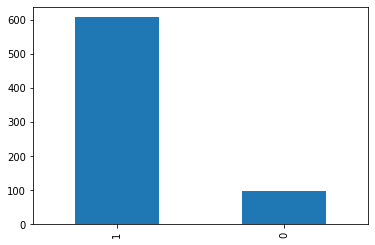

In [14]:
df['dvAntageous'].value_counts().plot(kind = 'bar')

In [15]:
print(train_data.groupby('dvAntageous').size().reset_index(name = 'count'))

   dvAntageous  count
0            0     72
1            1    492


In [16]:
# 한글과 공백을 제외하고 모두 제거
train_data['clauseArticle'] = train_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['clauseArticle'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

보험종류             0
clauseArticle    0
dvAntageous      0
dtype: int64


<ipython-input-16-e6fe363d0f1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['clauseArticle'] = train_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [17]:
# test 데이터도 전처리
test_data.drop_duplicates(subset = ['clauseArticle'], inplace=True) # 중복 제거
test_data['clauseArticle'] = test_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['clauseArticle'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 141


<ipython-input-17-1a7faf7cdbdf>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['clauseArticle'] = test_data['clauseArticle'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [18]:
mecab = Mecab()
stopwords = ['할', '일', '은', '있', '때', '수', '여', '날', '에', '는', '의', '를', '하', '이', '한', '을', '되', '지', '가']
train_data['tokenized'] = train_data['clauseArticle'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [19]:
test_data['tokenized'] = test_data['clauseArticle'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [20]:
# 단어와 길이 분포 확인 (0=불리, 1=유리)
negative_words = np.hstack(train_data[train_data.dvAntageous == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.dvAntageous == 1]['tokenized'].values)

In [21]:
# 빈도수가 높은 상위 20개 단어들을 출력 (불리)
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('지급', 101), ('제조', 98), ('계약', 83), ('보험금', 81), ('보험', 74), ('회사', 73), ('경우', 71), ('청구', 58), ('계약자', 57), ('이내', 57), ('청약', 50), ('부터', 50), ('또는', 48), ('합니다', 42), ('권', 42), ('철회', 41), ('으로', 36), ('습니다', 36), ('그', 35), ('피보험자', 32)]


In [22]:
# 빈도수가 높은 상위 20개 단어들을 출력 (유리)
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('계약', 653), ('지급', 547), ('제조', 529), ('보험', 448), ('청약', 429), ('부터', 416), ('회사', 408), ('경우', 386), ('또는', 365), ('이내', 351), ('계약자', 349), ('보험금', 343), ('철회', 283), ('습니다', 271), ('진단', 260), ('청구', 259), ('합니다', 219), ('그', 210), ('고', 207), ('않', 203)]


유리 평균 길이 : 40.84552845528455
불리 평균 길이 : 46.958333333333336


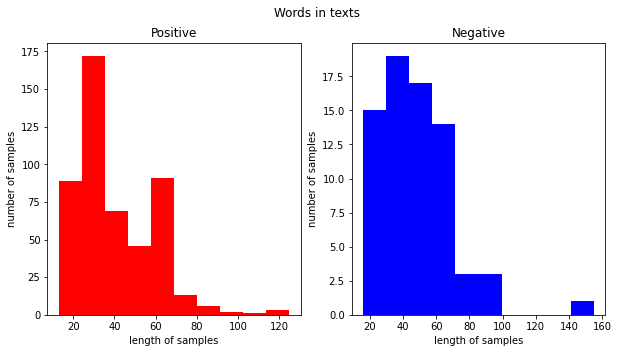

In [23]:
# 각각 길이 분포 확인
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['dvAntageous']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('유리 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['dvAntageous']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('불리 평균 길이 :', np.mean(text_len))
plt.show()

In [24]:
# 유리한 조항보다는 불리한 조항의 길이가 조금 더 길다.
X_train = train_data['tokenized'].values
y_train = train_data['dvAntageous'].values
X_test= test_data['tokenized'].values
y_test = test_data['dvAntageous'].values

In [25]:
# 정수 인코딩 : 단어 집합이 생성 -> 각 단어에 고유한 정수 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [26]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 804
등장 빈도가 1번 이하인 희귀 단어의 수: 194
단어 집합에서 희귀 단어의 비율: 24.129353233830848
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.8263406738510032


In [27]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 612


In [28]:
# 토크나이저의 인자로 넘겨주고, 텍스트 시퀀스를 정수 시퀀스로 변환. 정수 인코딩 과정에서 이보다 큰 숫자가 부여된 단어들은 OOV로 변환.
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [29]:
print(X_train[:3])
print(X_test[:3])

[[4, 7, 14, 13, 7, 14, 6, 7, 14, 65, 8, 156, 12, 66, 39, 13, 43, 242, 188, 113, 39, 87, 388, 150, 288, 44, 160, 5, 328, 289, 243, 134, 205, 275, 329, 181, 316, 27, 168, 83, 195, 3, 18, 36, 13, 125, 39, 31, 244, 264, 27, 66, 2, 7, 14, 9, 6, 7, 14, 65, 8, 156, 12, 90, 244, 264, 6, 27, 389, 390, 15, 20, 317, 290, 113, 9, 6, 39, 87, 46, 22, 128], [88, 103, 63, 2, 13, 25, 11, 196, 225, 47, 89, 2, 67, 68, 84, 6, 97, 9, 2, 8, 26, 12, 47, 59, 64, 8, 34, 12, 2, 76, 16], [88, 103, 63, 2, 13, 25, 11, 196, 225, 47, 89, 2, 67, 68, 84, 6, 97, 9, 2, 8, 26, 12, 47, 59, 64, 8, 34, 12, 2, 76, 16]]
[[4, 39, 417, 31, 5, 2, 604, 37, 9, 39, 303, 417, 18, 58, 367, 5, 6, 5, 13, 1, 39, 442, 11, 392, 242, 188, 9, 39, 87, 48, 211, 8, 12, 115], [4, 10, 3, 50, 6, 10, 3, 45, 159, 119, 121, 352, 120, 44, 30, 3, 306, 92, 46, 369, 370, 9, 19, 371, 235, 55, 45, 106, 3, 268, 42, 10, 164, 372, 6, 163, 10, 108, 12, 3, 160, 25, 11, 93, 43, 373, 81, 18, 36, 3, 268, 74, 222, 353, 155, 127, 90, 9, 189, 21, 4, 10, 15, 33, 60, 

최대 길이 : 155
평균 길이 : 41.6258865248227


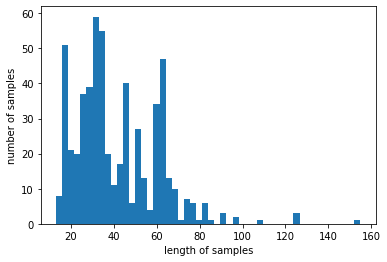

In [30]:
print('최대 길이 :',max(len(clauseArticle) for clauseArticle in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(clauseArticle) for clauseArticle in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [31]:
# 문구의 최대 길이는 155, 평균 길이는 약 42. 전체적으로는 80이하의 길이를 가짐.

In [32]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [33]:
# 최대 길이가 165이므로 만약 130으로 패딩할 경우, 몇 개의 샘플들을 온전히 보전할 수 있는지 확인
max_len = 130
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 130 이하인 샘플의 비율: 99.822695035461


In [34]:
# 99.82%가 130이하의 길이 -> 훈련용 길이 130으로 패딩
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [36]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (564, 130)
X_test의 크기(shape) : (141, 130)


In [37]:
print(y_train[:5])

[0 1 1 1 1]


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.4624 - acc: 0.8191
Epoch 1: val_acc improved from -inf to 0.82270, saving model to best_model.h5
18/18 [==============================] - 3s 119ms/step - loss: 0.4624 - acc: 0.8191 - val_loss: 0.5080 - val_acc: 0.8227
Epoch 2/20
18/18 [==============================] - ETA: 0s - loss: 0.3907 - acc: 0.8723
Epoch 2: val_acc did not improve from 0.82270
18/18 [==============================] - 2s 103ms/step - loss: 0.3907 - acc: 0.8723 - val_loss: 0.4708 - val_acc: 0.8227
Epoch 3/20
18/18 [==============================] - ETA: 0s - loss: 0.3728 - acc: 0.8723
Epoch 3: val_acc did not improve from 0.82270
18/18 [==============================] - 2s 103ms/step - loss: 0.3728 - acc: 0.8723 - val_loss: 0.4827 - val_acc: 0.8227
Epoch 4/20
18/18 [==============================] - ETA: 0s - loss: 0.3708 - acc: 0.8723
Epoch 4: val_acc did not improve from 0.82270
18/18 [==============================] - 2s 101ms/step - loss: 0.

In [39]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

5/5 [==============================] - 0s 21ms/step - loss: 0.5080 - acc: 0.8227

 테스트 정확도: 0.8227
